In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
import pandas as pd
import pymc3 as pm
import arviz as az

import importlib

import heirarchical_binomial
importlib.reload(heirarchical_binomial)
from heirarchical_binomial import explore_heirarchical_binomial

In [44]:
%matplotlib inline

In [45]:
consolidated = pd.read_csv('./BattingAverage.csv')
consolidated.rename(columns={'Player': 'individual', 'PriPos': 'category', 'Hits': 'successes', 'AtBats': 'attempts', 'PlayerNumber': 'individual_id', 'PriPosNumber': 'category_id'}, inplace=True)


In [46]:
(model, trace, az_data) = explore_heirarchical_binomial(consolidated)

num_individuals 948 num_categories 9
                         mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  \
p_overall               0.251  0.034   0.190    0.315      0.000    0.000   
concentration_overall  19.454  6.510   7.809   31.865      0.063    0.045   
p_category[0]           0.131  0.006   0.119    0.143      0.000    0.000   
p_category[1]           0.238  0.008   0.224    0.253      0.000    0.000   
p_category[2]           0.252  0.008   0.238    0.268      0.000    0.000   
...                       ...    ...     ...      ...        ...      ...   
p_individual[943]       0.144  0.057   0.052    0.257      0.000    0.000   
p_individual[944]       0.280  0.018   0.245    0.313      0.000    0.000   
p_individual[945]       0.170  0.039   0.100    0.245      0.000    0.000   
p_individual[946]       0.097  0.032   0.039    0.154      0.000    0.000   
p_individual[947]       0.269  0.018   0.236    0.303      0.000    0.000   

                       ess_mean   ess_

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_individual, concentration_category, p_category, concentration_overall, p_overall]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:40<00:00, 246.20draws/s]
The number of effective samples is smaller than 25% for some parameters.


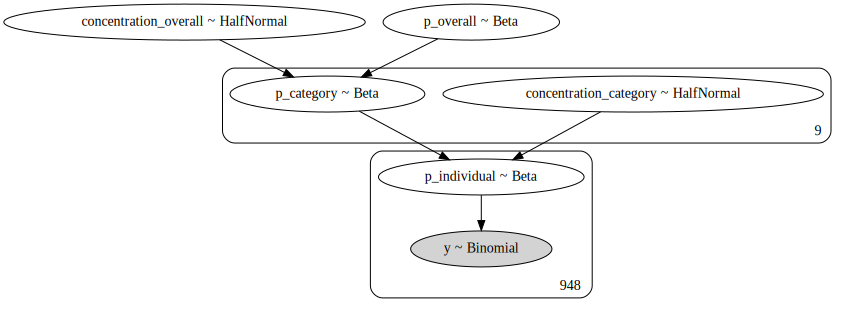

In [47]:
pm.model_to_graphviz(model)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f12fdbb9208>],
      dtype=object)

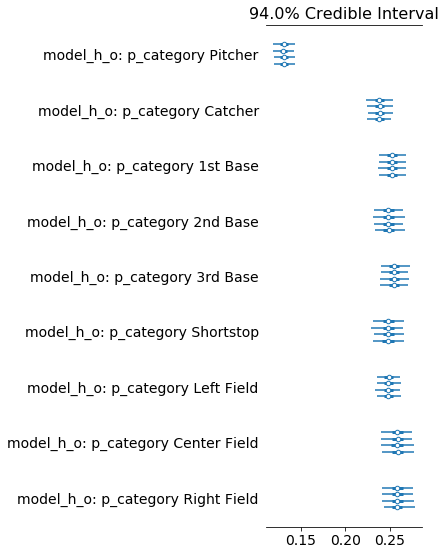

In [48]:
az.plot_forest(az_data, model_names=['model_h_o'], var_names='p_category')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f12fe148828>],
      dtype=object)

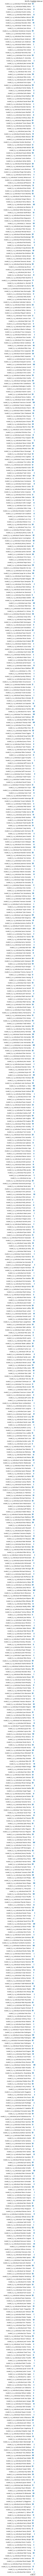

In [49]:
az.plot_forest(az_data, model_names=['model_h_o'], var_names='p_individual')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f12d1150978>,
      dtype=object)

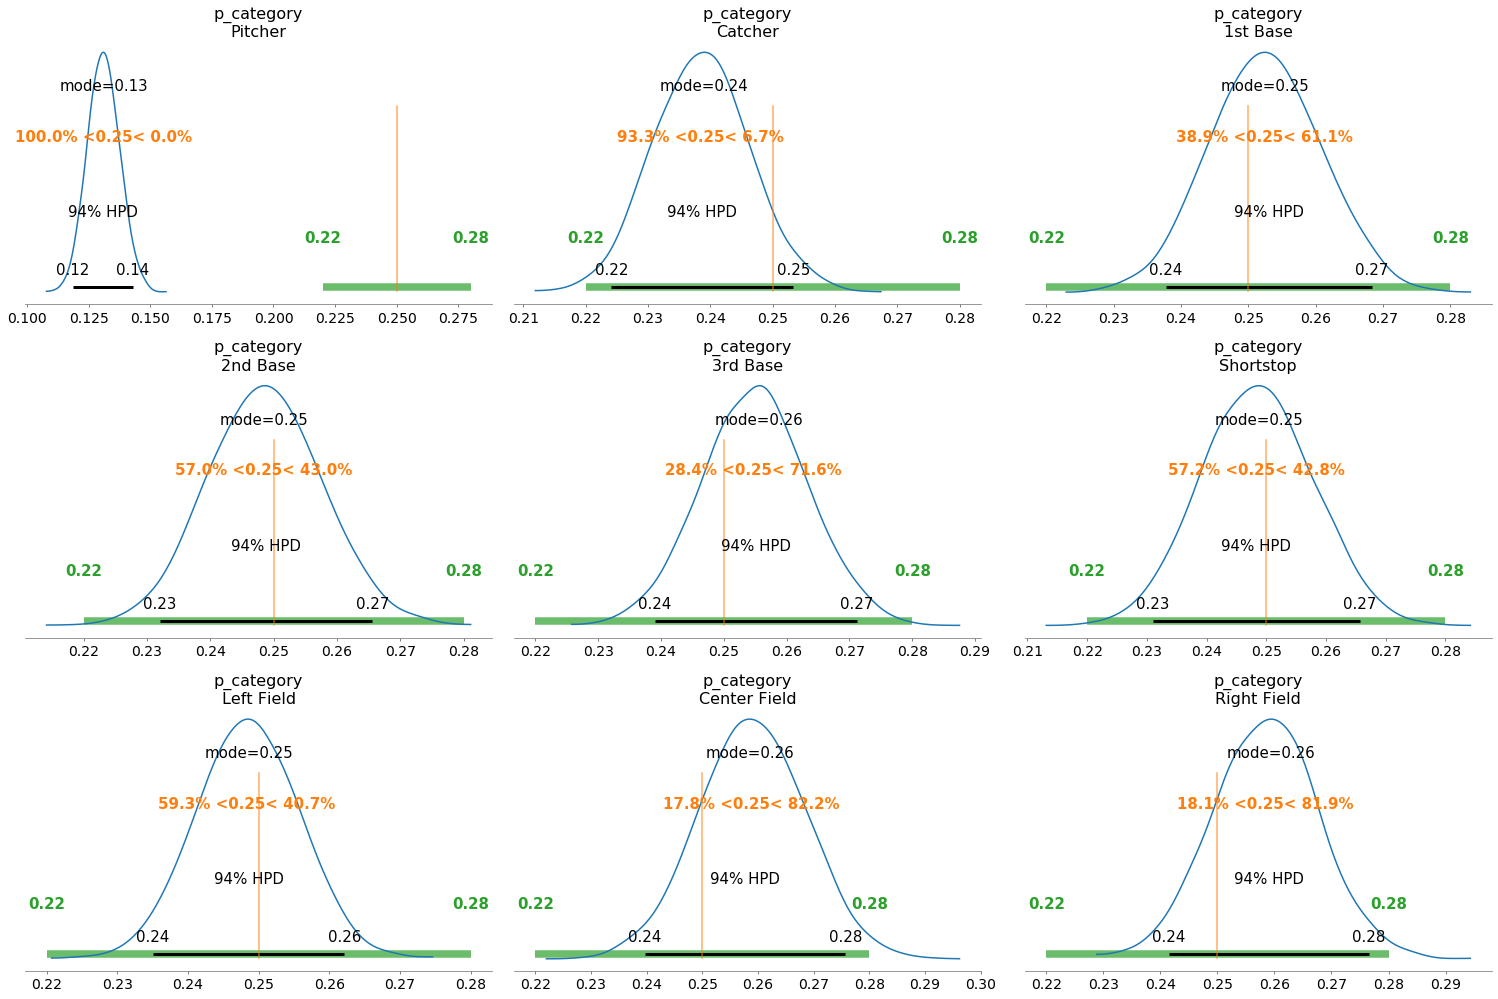

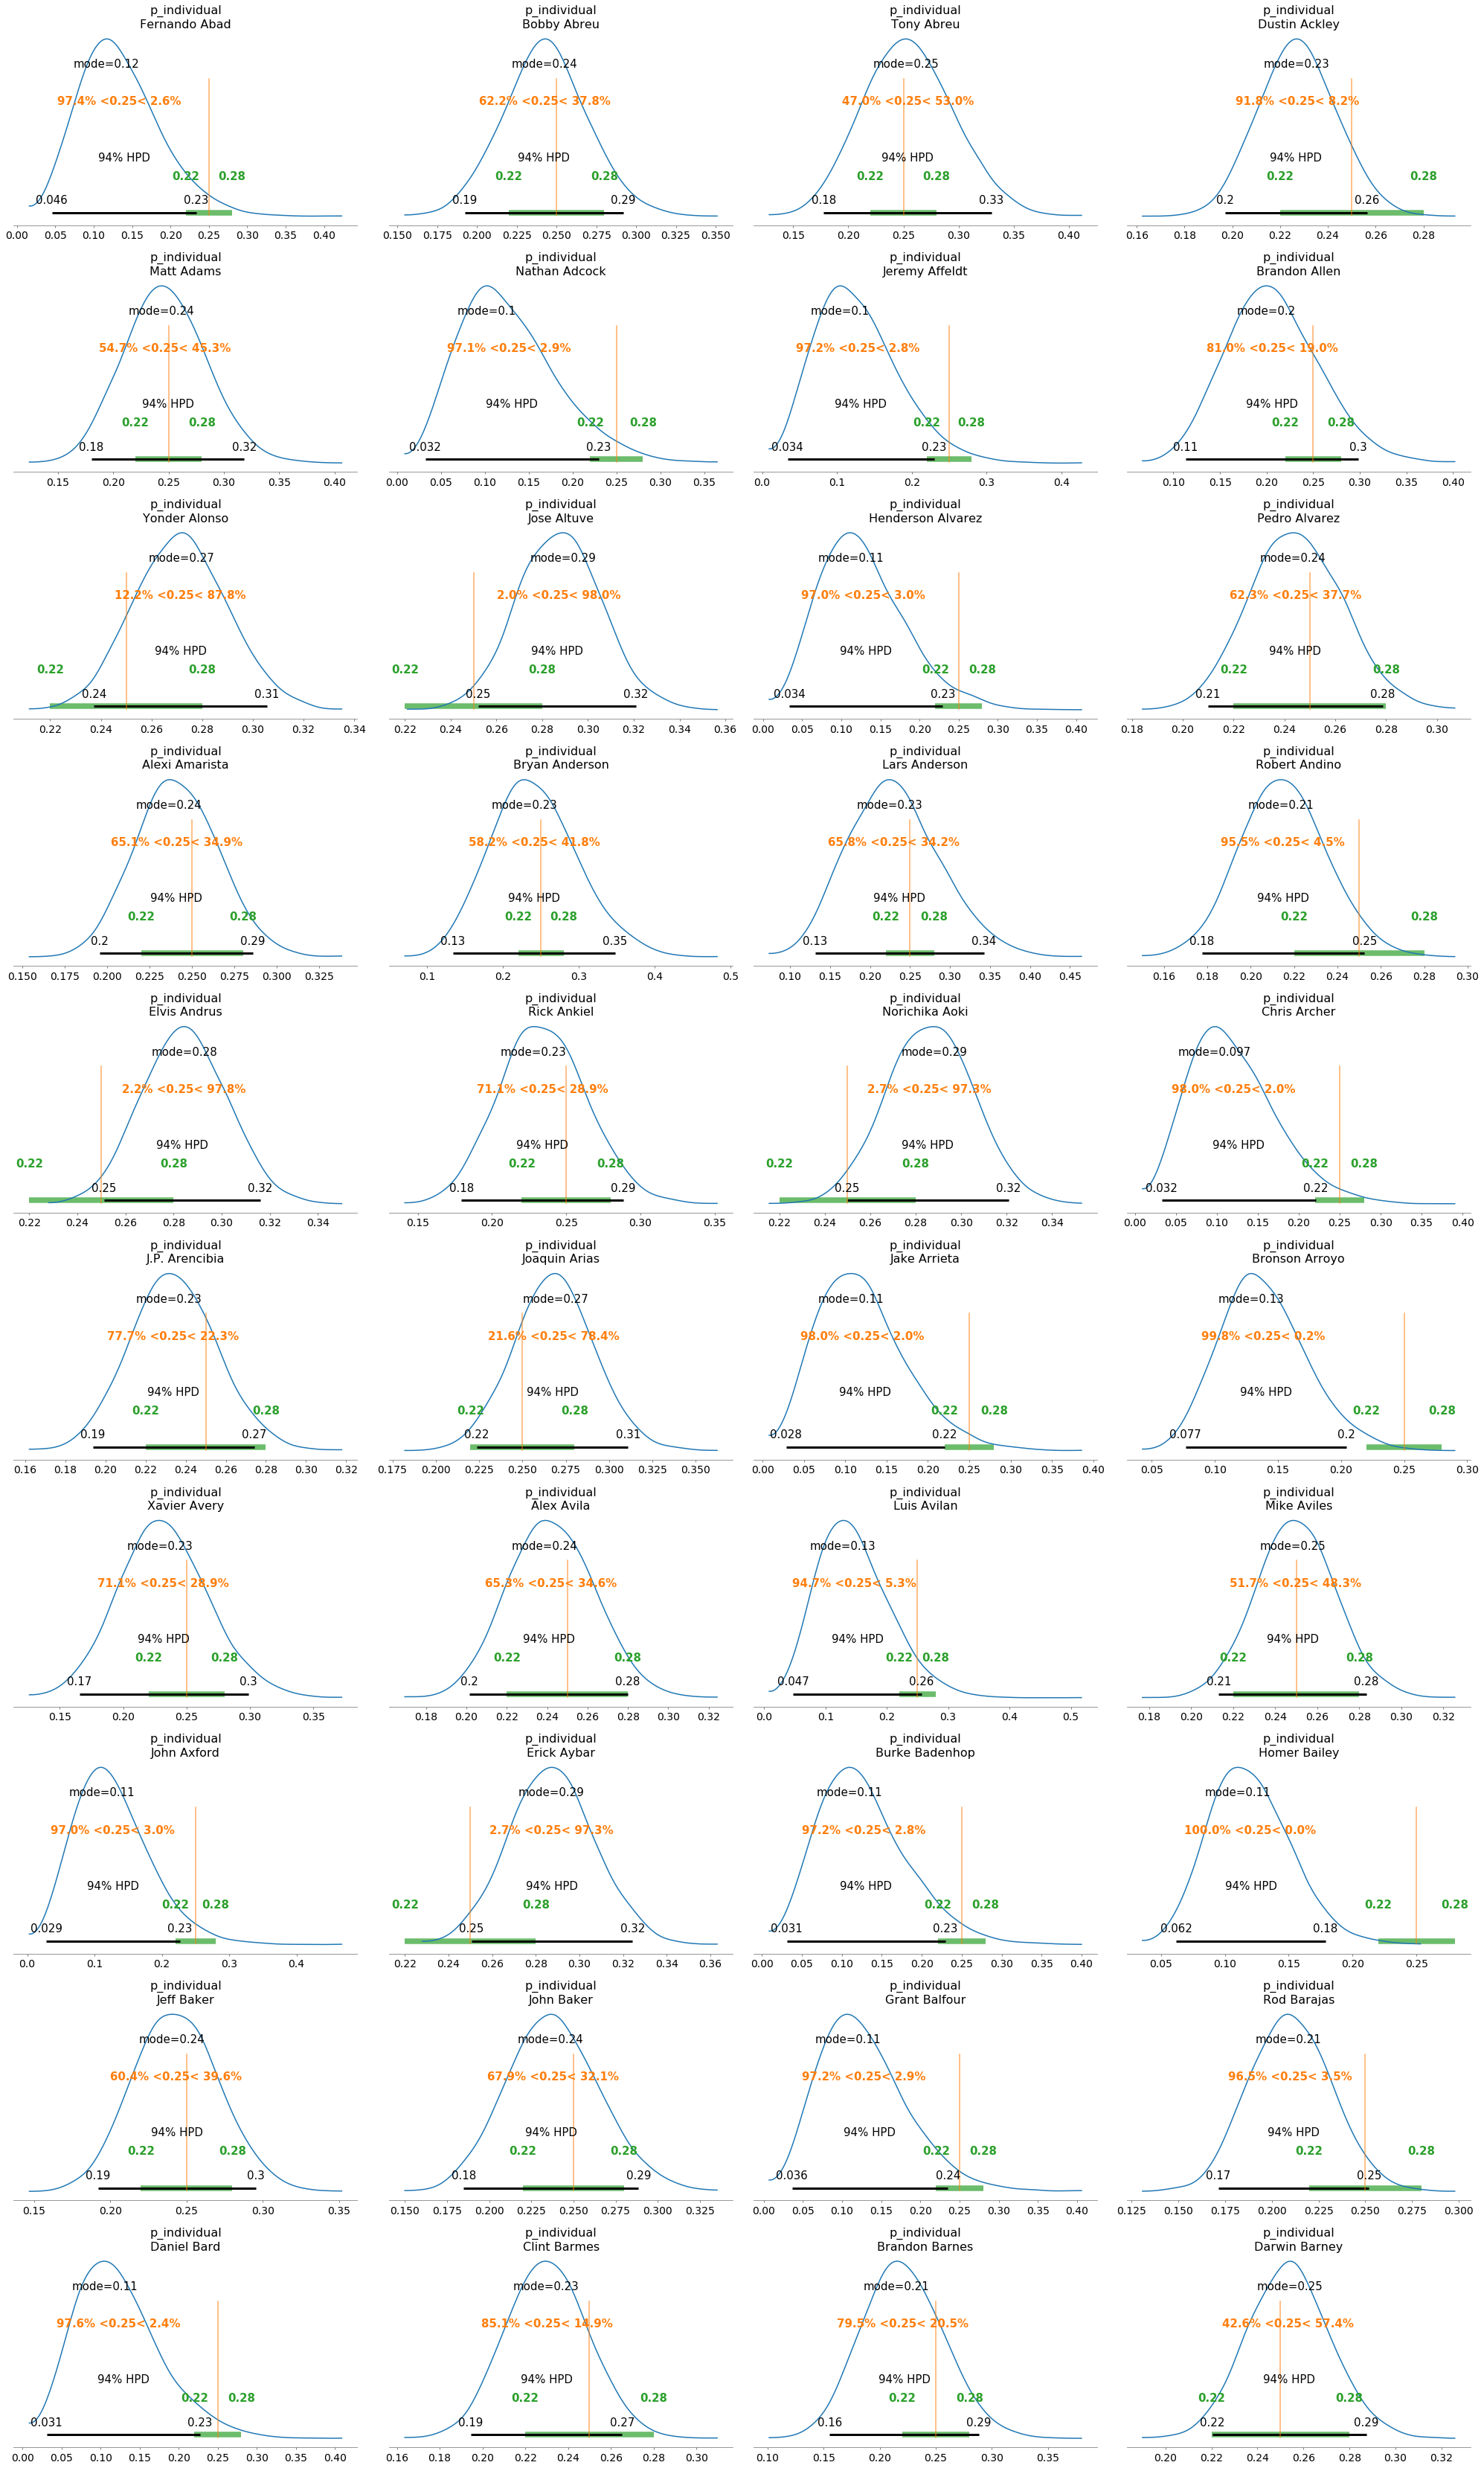

In [50]:
mid_point = trace['p_overall'].mean()
mid_point = round(mid_point, 2)
left_point = round(mid_point-mid_point*0.1, 2)
right_point = round(mid_point+mid_point*0.1, 2)

az.plot_posterior(az_data, rope=[left_point, right_point], ref_val=mid_point, point_estimate='mode', var_names='p_category')
az.plot_posterior(az_data, rope=[left_point, right_point], ref_val=mid_point, point_estimate='mode', var_names='p_individual')
